# Εγκατάσταση και ενημέρωση βιβλιοθηκών

In [ ]:
!pip install --upgrade pip                #upgrade pip package installer
!pip install scikit-learn --upgrade       #upgrade scikit-learn package
!pip install numpy --upgrade              #upgrade numpy package
!pip install pandas --upgrade             #--upgrade #upgrade pandas package
!pip install --upgrade imbalanced-learn

# Στοιχεία ομάδας

**Αριθμός ομάδας**: 22

**Πρώτο μέλος**:  
Ονοματεπώνυμο: Ψαρουδάκης Ανδρέας <br>
Αριθμός μητρώου: 03116001 <br>
Email:  andreaspsaroudakis@gmail.com <br>

**Δεύτερο μέλος**: <br>
Ονοματεπώνυμο: Τζε Χριστίνα-Ουρανία <br>
Αριθμός μητρώου: 03116079 <br>
Email: xristina.rania.tze@gmail.com

# Βασικές Πληροφορίες


## 1) Σύντομη παρουσίαση του dataset

Το μικρό dataset που αντιστοιχεί στην ομάδα μας είναι το [Japanese Credit Screening Data Set](http://archive.ics.uci.edu/ml/datasets/Japanese+Credit+Screening) (S06). Δημιουργήθηκε ρωτώντας ανθρώπους σε μια Ιαπωνική Εταιρεία η οποία χορηγεί χρηματικές πιστώσεις. Συνιστά ένα σύνολο δεδομένων ιδιαίτερα σημαντικό για τους υπεύθυνους λήψης οικονομικών αποφάσεων καθώς αφορά εφαρμογές πιστωτικών καρτών. Αποτελείται από 690 δείγματα, τα οποία κατηγοριοποιούνται σε 2 κλάσεις. Μεταξύ των samples, τα 383 ανήκουν στην κατηγορία "-" ενώ τα υπόλοιπα 307 στην κατηγορία "+". Τα "αρνητικά" δείγματα αφορούν περιπτώσεις ανθρώπων που δεν τους χορηγήθηκε χρηματική πίστωση σε αντίθεση με τα "θετικά" στα οποία οι άνθρωποι έλαβαν πίστωση. Πρόκειται επομένως, για ένα **binary classification** πρόβλημα. Κάθε δείγμα αποτελείται από 15 χαρακτηριστικά, από τα οποία τα 9 είναι κατηγορικά και τα 6 είναι αριθμητικά καθώς και από την ετικέτα κλάσης. Τα ονόματα αλλά και οι τιμές όλων των attributes έχουν κωδικοποιηθεί σε σύμβολα χωρίς κάποια σημασία για λόγους προστασίας προσωπικών δεδομένων.

In [ ]:
import pandas as pd                                         # Import pandas library 

df = pd.read_csv("crx.data", na_values = '?', header=None)  # Read dataset from file
df                                                          # Show dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


## 2) Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών

Αρχικά, βρίσκουμε το πλήθος των δειγμάτων του dataset ως το σύνολο των γραμμών του df που περιέχει όλα τα samples. Υπολογίζουμε επίσης το πλήθος των χαρακτηριστικών κάθε δείγματος, το οποίο ισούται με τον αριθμό των στηλών του df μειωμένο κατά 1 (καθώς η τελευταία στήλη αντιπροσωπεύει την ετικέτα κάθε δείγματος).

In [ ]:
print("\033[1mNumber of samples is: {}".format(df.shape[0]))
print("Number of features per sample is: {}\n".format(df.shape[1]-1))

Number of samples is: 690
Number of features per sample is: 15



Στη συνέχεια τυπώνουμε τον τύπο και των 15 features κάθε δείγματος.

In [ ]:
print("\033[1mFeature Types\n")
print(df.iloc[:,:15].dtypes)

Feature Types

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13    float64
14      int64
dtype: object


Παρατηρούμε ότι έχουμε συνολικά 9 κατηγορικά χαρακτηριστικά (τύπου **object**) και 6 αριθμητικά χαρακτηριστικά (4 τύπου **float64** και 2 τύπου **int64**). Να σημειωθεί πως η βιβλιοθήκη **pandas** αποθηκεύει τα **string** χαρακτηριστικά ως **obejcts** εφόσον δεν προσδιορίζεται κάποιο συγκεκριμένο μήκος συμβολοσειράς (variable length). Θα μπορούσαμε να μετατρέψουμε τα χαρακτηριστικά αυτά σε **strings**, ωστόσο τα στάδια προεπεξεργασίας των δεδομένων που ακολουθούν δεν επιβάλλουν κάποιo τέτοιο μετασχηματισμό, για αυτό και τα αφήνουμε ως έχουν. Όλα τα **αριθμητικά χαρακτηριστικά** του dataset είναι **διατετατγμένα** ενώ όλα τα **κατηγορικά χαρακτηριστικά** υποθέτουμε ότι είναι **μη διατεταγμένα** καθώς δεν γνωρίζουμε τι αντιπροσωπεύουν λόγω της κωδικοποίησης που έχει γίνει.

## 3) Επικεφαλίδες και αρίθμηση γραμμών

Ανοίγοντας το αρχείο δεδομένων μας σε έναν text editor, παρατηρούμε πως αυτό δεν διαθέτει επικεφαλίδες, καθώς η πρώτη γραμμή του δεν περιέχει ονόματα για τα χαρακτηριστικά των δειγμάτων αλλά το πρώτο δείγμα του dataset. Για το λόγο αυτό, κατά το διάβασμα του αρχείου, μέσω της συνάρτησης **read_csv** θέτουμε το **header** σε **None**. 

```python
df = pd.read_csv("crx.data", na_values = '?', header=None)  # Read dataset from file
```

Αυτό είναι αναγκαίο ώστε το πρώτο δείγμα του αρχείο να μην διαβαστεί ως επικεφαλίδα. Επίσης, το αρχείο δεν διαθέτει αρίθμηση γραμμών, ωστόσο αυτή προκύπτει άμεσα από τη μετατροπή του συνόλου δεδομένων σε dataframe της βιβλιοθήκης pandas.

## 4) Ετικέτες κλάσεων

Σύμφωνα με το documentation, οι ετικέτες των κλάσεων βρίσκονται στην τελευταία κολόνα (κολόνα 15, δηλαδή στην 16η κολόνα αφού η αρίθμηση ξεκινάει από το 0) του dataframe και λαμβάνουν τιμές **"+"** και **"-"** ανάλογα με το αν έχει χορηγηθεί πίστωση ή όχι αντίστοιχα.


## 5) Προεπεξεργασία δεδομένων

Δεν χρειάζεται κάποια μετατροπή στα αρχεία text. Ωστόσο, στα βήματα που ακολουθούν διαχειριζόμαστε τις απουσιάζουσες τιμές του dataset και μετατρέπουμε με κατάλληλο τρόπο τα κατηγορικά χαρακτηριστικά σε αριθμητικά (τύπου float64)


## 6) Απουσιάζουσες τιμές

Στο σύνολο δεδομένων μας υπάρχουν ορισμένες απουσιάζουσες τιμές χαρακτηριστικών, οι οποίες συμβολίζονται με **"?"**. Κατά το διάβασμα του αρχείου εισόδου, μέσω της εντολής **read_csv**, θέτουμε την τιμή της μεταβλητής **na_values** σε **"?"** έτσι ώστε οι απουσιάζουσες τιμές να αναγνωριστούν ως **NaN**.

```python
df = pd.read_csv("crx.data", na_values = '?', header=None)  # Read dataset from file
```

Στη συνέχεια,με χρήση της συνάρτησης **DataFrame.isna** και της **DataFrame.any** βρίσκουμε τις γραμμές εκείνες στις οποίες εμφανίζεται μια τουλάχιστον απουσιάζουσα τιμή (NaN) και έπειτα υπολογίζουμε το πλήθος τους (με χρήση της **sum**). Τέλος, διαιρούμε το πλήθος αυτό με τον συνολικό αριθμό γραμμών του df έτσι ώστε να λάβουμε το ποσοστό των δειγμάτων με missing values επί του συνόλου. 

In [ ]:
rows_with_NaN = df.isna().any(axis=1).sum()    # Calculate number of rows with at least one 'NaN' value
print("\033[1mNumber of samples with at least one \'NaN\' feature value is {} out of {} ".format(rows_with_NaN,df.shape[0]))
print("Percentage of samples with at least one \'NaN\' features is: {} %".format((rows_with_NaN/df.shape[0])*100))

Number of samples with at least one 'NaN' feature value is 37 out of 690 
Percentage of samples with at least one 'NaN' features is: 5.36231884057971 %


## 7) Αριθμός κλάσεων και ποσοστά δειγμάτων επί του συνόλου

Υπολογίζουμε τώρα τον αριθμό των κλάσεων με χρήση της συνάρτησης **unique**, μετρώντας το πλήθος των διαφορετικών τιμών που εμφανίζονται στην κολόνα 15 (δηλαδή στη στήλη με τις ετικέτες των κλάσεων). 

In [ ]:
classes = len(pd.unique(df[15]))
print("\033[1mNumber of classes is {}".format(classes))

Number of classes is 2


Όπως ήταν αναμενόμενο προκύπτουν συνολικά 2 κλάσεις, η **"+"** και η **"-"**, όπως αναφέραμε και προηγουμένως. Aξιοποιούμε τη συνάρτηση **value_counts** ώστε να υπολογίσουμε το πλήθος των δειγμάτων κάθε κατηγορίας. Έπειτα, διαιρούμε κάθε πλήθος με το συνολικό αριθμό από samples, οπότε και λαμβάνουμε το ποσοστό δειγμάτων κάθε κλάσης.

In [ ]:
percentages = []
for val, cnt in df[15].value_counts().iteritems():
    print ('\033[1m','Class \'{}\''.format(val[0]), 'has a total of', cnt, 'samples','(Percentage: {} %)'.format((cnt/df.shape[0])*100))
    percentages.append(cnt)

 Class '-' has a total of 383 samples (Percentage: 55.507246376811594 %)
 Class '+' has a total of 307 samples (Percentage: 44.492753623188406 %)


Τέλος, παίρνουμε το λόγο των δύο ποσοστών που προκύπτουν ώστε να εξετάσουμε κατά πόσο το dataset μας είναι ισορροπημένο ή όχι.

In [ ]:
print("\n\033[1m The ratio of number of samples between the two classes is: {}".format(max(percentages)/min(percentages)))


 The ratio of number of samples between the two classes is: 1.247557003257329


Παρατηρούμε πως το dataset είναι **ισορροπημένο** καθώς ο λόγος του αριθμού δειγμάτων της πολυπληθέστερης κλάσης (**"-"**) προς τον αριθμό δειγμάτων της άλλης κλάσης (**"+"**) είναι μικρότερος του 1,5.  Αυτό σημαίνει πως καμία εκ των δύο κλάσεων δεν είναι τουλάχιστον 1,5 φορά πιο συχνή από την άλλη (60% - 40%). Κατά συνέπεια, δεν απαιτείται η εφαρμογή κάποιας διαδικασίας εξισορρόπησης του dataset (π.χ. oversampling).

## 8) Διαχωρισμός σε train και test set, διαχείριση απουσιάζουσων τιμών και μη διατεταγμένων χαρακτηριστικών

Επειδή το ποσοστό δειγμάτων με τιμές που απουσιάζουν είναι σχετικά μικρό $(\cong5.36 \%)$ μπορούμε να αφαιρέσουμε τα συγκεκριμένα δείγματα από το dataset, χωρίς κάποια σημαντική απώλεια πληροφορίας. Η διαδικασία αυτή λαμβάνει χώρα πριν το το χωρισμό σε train και test set και πραγματοποιείται με χρήση της συνάρτησης **dropna**.

In [ ]:
reduced_df = df.dropna(axis=0) # κρατάμε μόνο τα δείγματα με αριθμητικές τιμές

Έχοντας αφαιρέσαι πλήρως τα δείγματα με τις απουσιάζουσες τιμές, χωρίζουμε το αρχικό dataframe (που περιέχει όλο το dataset) σε δύο επιμέρους, ένα που περιέχει τα features των δειγμάτων και ονομάζεται **features_df** (πρώτες 15 κολόνες) και ένα που περιέχει τις ετικέτες των κλάσεων και ονομάζεται **labels_df** (16η κολόνα). Να σημειωθεί ότι πριν την αποθήκευση του dataframe-κολόνα **labels_df**  μετασχηματίζουμε τις συμβολοσειρές **"+"** και **"-"** σε **0** και **1** αντίστοιχα, με χρήση της συνάρητσης **map**, έχοντας πρωτίστως ορίσει το συγκεκριμένο mapping. 

In [ ]:
features_df = reduced_df.iloc[:, 0:15]
class_mapping = {'+': 0, '-': 1}
labels_df = reduced_df[15].map(class_mapping)  

Δίνουμε τώρα τα 2 νέα dataframes ως όρισμα στη συνάρτηση **train_test_split** της βιβλιοθήκης sklearn, για το χωρισμό σε train και test set. Χρησιμοποιούμε **20%** των δειγμάτων για **test set** και **80%** για **train set**.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.20, random_state = 36)

Σε αυτό το στάδιο, αφότου έχουμε χωρίσει σε train και test set, πρέπει να διαχειριστούμε τα κατηγορικά χαρακτηριστικά. Όπως αναφέρθηκε και νωρίτερα, αυτά είναι μη διατεταγμένα και επομένως δεν είναι δυνατόν κάθε διαφορετική τιμή που λαμβάνουν να αντικατασταθεί απλώς με μια αριθμητική, καθώς στην περίπτωση αυτή υποθέτουμε λανθασμένα ότι το σύνολο τιμών των κατηγορικών μεταβλητών είναι ordered και έτσι οδηγούμε τον ταξινομητή σε λάθη. Μετατρέπουμε λοιπόν, κάθε κατηγορικό χαρακτηριστικό με m τιμές σε m binary χαρακτηριστικά από τα οποία μόνο ένα είναι ενεργό κάθε φορά. Αυτό επιτυγχάνεται με χρήση της συνάρητσης **get_dummies**, προσδιορίζοντας τις κολόνες που περιέχουν τα κατηγορικά χαρακτηριστικά. 

In [ ]:
X_train_dummies = pd.get_dummies(X_train, columns=[0,3,4,5,6,8,9,11,12])
X_test_dummies = pd.get_dummies(X_test, columns=[0,3,4,5,6,8,9,11,12])

Μετά την εφαρμογή της συνάρτησης, ενδέχεται το train και το test set να μην έχουν τον ίδιο αριθμό από κολόνες, για το λόγο του ότι μια τιμή ενός κατηγορικού χαρακτηριστικού μπορεί να μην εμφανίζεται και στα δύο σύνολα (π.χ. ένα string attribute, που συνολικά λαμβάνει 3 διαφορετικές τιμές, υπάρχει περίπτωση σε κάποιο σύνολο, έστω στο test, να λαμάνει μόνο 1 ή 2 εξ' αυτών ενώ στο train να λαμβάνει και τις 3). Κάτι τέτοιο δημιουργεί μια ανισορροπία μεταξύ του train και του test set. Για να εξαλείψουμε το συγκεκριμένο πρόβλημα, καλούμε τη συνάρτηση **align**, η οποία συμπληρώνει με τις απαραίτητες κολόνες, γεμίζοντας τες με 0, έτσι ώστε τα attributes που είχαν χαθεί να επανέλθουν αλλά ταυτόχρονα να παραμείνουν ανενεργά.

In [ ]:
X_train_dummies,X_test_dummies = X_train_dummies.align(X_test_dummies, fill_value=0, join='outer', axis=1)

Τέλος, εφαρμόζουμε τη μέθοδο **values** στα dataframes **X_train_dummies**,  **X_test_dummies**,  **y_train** και **y_test** για τη μετατροπή τους σε numpy πίνακες.

In [ ]:
# Convert to numpy array

X_train,X_test = X_train_dummies.values,X_test_dummies.values
y_train,y_test = y_train.values,y_test.values

Eπαληθεύμε ότι όλοι οι πίνακες έχουν τις επιθυμητές διαστάσεις.

In [ ]:
print("\033[1m X_train shape is: {}".format(X_train.shape))
print("\033[1m X_test shape is: {}".format(X_test.shape))
print("\033[1m y_train shape is: {}".format(y_train.shape))
print("\033[1m y_test shape is: {}".format(y_test.shape))

 X_train shape is: (522, 46)
 X_test shape is: (131, 46)
 y_train shape is: (522,)
 y_test shape is: (131,)


# Ταξινόμηση


Στο σημείο αυτό εξετάζουμε τους ταξινομητές **Dummy**, **Gaussian Naive Bayes** και **kNN**. Συγκεκριμένα, τους αρχικοποιούμε με τις default τιμές τους και τους εκπαιδεύουμε στο train dataset. Στη συνέχεια, κάνουμε την εκτίμηση στο test set και για κάθε έναν από αυτούς τυπώνουμε τα εξής: **confusion matrix**, **f1-micro average** και **f1-macro average**.


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import itertools

### Υλοποίηση συνάρτησης απεικόνισης Πίνακα Σύγχυσης (Confusion Matrix)

Η βάση για τις μετρικές απόδοσης των ταξινομητών είναι ο πίνακας σύγχυσης $C$    (confusion matrix). Κάθε στοιχείο του $C_{i, j}$ είναι ίσο με τα δείγματα που ενώ ανήκουν στην κατηγορία $i$ ταξινομήθηκαν στην κατηγορία  $j$. Για την απεικόνισή του ορίζουμε την συνάρτηση **custom_plot_confusion_matrix**. Για την κλήση της συνάρτησης, απαιτείται προηγουμένως η αξιοποίηση της **confusion_matrix** της sklearn για τον υπολογισμό του πίνακα σύγχυσης, ο οποίος δίνεται σαν πρώτο όρισμα στην **custom_plot_confusion_matrix**.

In [ ]:
def custom_plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12)
    plt.yticks(tick_marks, classes,fontsize=12)

    fmt = 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")

    plt.ylabel('True label',fontsize=12)
    plt.xlabel('Predicted label',fontsize=12)
    plt.tight_layout()  
    plt.show()

Άλλες μετρικές που χρησιμοποιούνται συχνά για την αξιολόγηση των ταξινομητών είναι η ακρίβεια P (Precision), η ανάκληση R (Recall) και το F1 score. Αυτές ορίζονται ως εξής:


*   Precision: είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false positives ($F_p$). 
$$P = \frac{T_p}{T_p+F_p}$$
*   Recall: είναι ο λόγος των true positives ($T_p$) ως προς τον αριθμό των true positives συν τον αριθμό των false negatives ($F_n$). 
$$R = \frac{T_p}{T_p + F_n}$$
*   F1: είναι ο αρμονικός μέσος της ακρίβειας και της ανάκλησης. 
$$F1 = 2\frac{P \times R}{P+R}$$





Προτού ορίσουμε τα μοντέλα μας, αρχικοποιούμε τρία λεξικά, τα **accuracies**, **f1_micros** και **f1_macros**, τα οποία έχουν για κλειδιά τα ονόματα των ταξινομητών που μελετάμε και για τιμές την ακρίβεια, τη μετρική f1-micro average και την μετρική f1-macro average αντίστοιχα.

In [ ]:
# Ignore filter warnings 

from warnings import filterwarnings
filterwarnings('ignore')

# Initialize dictionaries

accuracies = {}
f1_micros ={}
f1_macros = {}


## 1) **Dummy Classifier**

Η κλάση **DummyClassifier** δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:

* **“uniform”**: προβλέπει τυχαία και ομοιόμορφα.
* **“constant”**: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης.
* **“most_frequent”**: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* **“stratified”**: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

### i) Uniform

Αρχικά, ορίζουμε το μοντέλο ταξινόμησης θέτοντας **uniform** την παράμετρο strategy. Με τη μέθοδο **fit** εκπαιδεύουμε τον ταξινομητή στο σύνολο εκπαίδευσης ενώ με την **predict** παράγουμε τις προβλέψεις για τα δεδομένα ελέγχου. Για τον υπολογισμό του accuracy χρησιμοποιούμε την μέθοδο **score** του αντικειμένου dummy classifier. Mέσω της συνάρτησης  **precision_recall_fscore_support** και θέτοντας την παράμετρο **average** σε **'micro'** ή **'macro'** βρίσκουμε αντίστοιχα τα ζητούμενα f1-micro και f1-macro ως το τρίτο στοιχείο (βρίσκεται στη θέση 2 αφού η αρίθμηση ξεκινάει από το μηδέν) από την επιστρεφόμενη τούπλα (precision, recall, fscore, support). Στο τέλος, για μια πιο ωραία και συνοπτική παρουσίαση των αποτελεσμάτων χρησιμοποιούμε την **classification_report** η οποία τυπώνει τα παραπάνω πρώτα για κάθε κλάση και μετά με μέσους όρους. Ακριβώς η ίδια διαδικασία επαναλαμβάνεται και για τους υπόλοιπους dummy ταξινομητές αφού πρώτα θέσουμε κατάλληλα την παράμετρο strategy.

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_uniform.fit(X_train, y_train)
predictions = dc_uniform.predict(X_test)
accuracies['uniform (random)'] = dc_uniform.score(X_test, y_test)
f1_micros['uniform (random)'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['uniform (random)'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['uniform (random)']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['uniform (random)']*100))

F1-micro average score is: 54.19847328244275 %
F1-macro average score is: 53.98126463700235 %


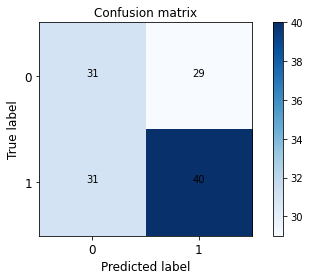

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0',"1"]))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        60
           1       0.58      0.56      0.57        71

    accuracy                           0.54       131
   macro avg       0.54      0.54      0.54       131
weighted avg       0.54      0.54      0.54       131



Για τον συγκεκριμένο ταξινομητή δεν έχει ιδιαίτερο νόημα ο σχολιασμός των αποτελεσμάτων αφού η πρόβλεψη πραγματοποιείται τυχαία και ομοιόμορφα και επομένως σε κάθε τρέξιμο του κώδικα λαμβάνουμε διαφορετικές τιμές.

### ii) Constant 0

In [ ]:
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_0.fit(X_train, y_train)
predictions = dc_constant_0.predict(X_test)
accuracies['Constant 0'] = dc_constant_0.score(X_test, y_test)
f1_micros['Constant 0'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Constant 0'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Constant 0']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Constant 0']*100))

F1-micro average score is: 45.80152671755725 %
F1-macro average score is: 31.413612565445025 %


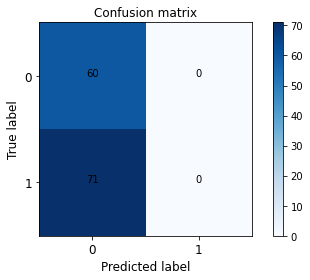

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        60
           1       0.00      0.00      0.00        71

    accuracy                           0.46       131
   macro avg       0.23      0.50      0.31       131
weighted avg       0.21      0.46      0.29       131



Στους constant classifiers ισχύει ότι για το label που ταυτίζεται με την constant σταθερά (εδώ το '0') το recall είναι 1.00 . Επιπλέον, το precision είναι πάντα ίσο με τo ποσοστό των δειγμάτων του test set που ανήκουν στην συγκεκριμένη κατηγορία (εδώ το '0', δηλαδή την κατηγορία "+").

### iii) Constant 1

In [ ]:
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_1.fit(X_train, y_train)
predictions = dc_constant_1.predict(X_test)
accuracies['Constant 1'] = dc_constant_1.score(X_test, y_test)
f1_micros['Constant 1'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Constant 1'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Constant 1']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Constant 1']*100))

F1-micro average score is: 54.19847328244275 %
F1-macro average score is: 35.148514851485146 %


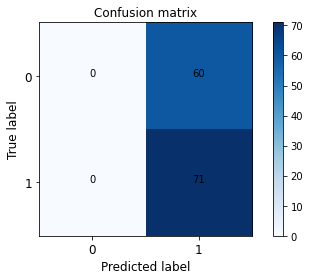

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.54      1.00      0.70        71

    accuracy                           0.54       131
   macro avg       0.27      0.50      0.35       131
weighted avg       0.29      0.54      0.38       131



Ισχύουν τα ίδια με τον Constant 0 με την διαφορά ότι έχει αντιστραφεί ο ρόλος των labels. Πράγματι, εδώ για την κατηγορία 1 ("-") το recall είναι ίσο με 1.00 ενώ για την 0 ("+") είναι 0.00. 

### iv) Most frequent

In [ ]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_most_frequent.fit(X_train, y_train)
predictions = dc_most_frequent.predict(X_test)
accuracies['Most frequent label'] = dc_most_frequent.score(X_test, y_test)
f1_micros['Most frequent label'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Most frequent label'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Most frequent label']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Most frequent label']*100))

F1-micro average score is: 54.19847328244275 %
F1-macro average score is: 35.148514851485146 %


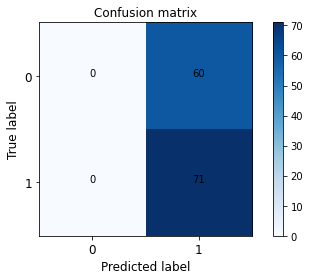

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.54      1.00      0.70        71

    accuracy                           0.54       131
   macro avg       0.27      0.50      0.35       131
weighted avg       0.29      0.54      0.38       131



Ο Most Frequent Dummy Classifier ταξινομεί τα δείγματα στην πιο συχνή κατηγορία στο training set. Αν αυτή είναι η '0' τότε ο Most Frequent ταξινομητής συμπίπτει με τον Constant 0. Σε αντίθετη περίπτωση συμπίπτει με τον Constant 1.

### v) Stratified

In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")
dc_stratified.fit(X_train, y_train)
predictions = dc_stratified.predict(X_test)
accuracies['Stratified'] = dc_stratified.score(X_test, y_test)
f1_micros['Stratified'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Stratified'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Stratified']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Stratified']*100))

F1-micro average score is: 48.854961832061065 %
F1-macro average score is: 48.66350821781599 %


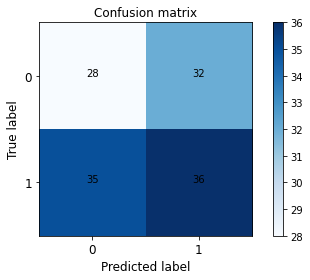

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.44      0.47      0.46        60
           1       0.53      0.51      0.52        71

    accuracy                           0.49       131
   macro avg       0.49      0.49      0.49       131
weighted avg       0.49      0.49      0.49       131



Τα αποτελέσματα του recall και precision για τον stratified είναι πολύ κοντά στην ισορροπία του dataset, γεγονός αναμενόμενο αφού ο Stratified Dummy διατηρεί την κατανομή των κλάσεων στο training set (a-priori πιθανότητες).

## 2) **Gaussian Naive Bayes Classifier**

Θα μελετήσουμε τώρα τον **Gaussian Naive Bayes Classifier**. H βασική ιδέα λειτουργίας ενός μπευζιανού ταξινομητή είναι ο γνωστός νόμος του Bayes: \\
 $$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$$

Αν επιπλέον υποθέσουμε ότι τα χαρακτηριστικά είναι όλα ανεξάρτητα μεταξύ τους τότε προκύπτει ο γνωστός μας **Naive Bayes Classifier**. 
Με δεδομένα μια μεταβλητή κατηγορίας (κλάσης) $y$ και ένα εξαρτώμενο διάνυσμα χαρακτηριστικών $x_1$ μέχρι $x_n$, σύμφωνα με το θεώρημα του Bayes θα ισχύει 
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}{P(x_1, \dots, x_n)}$$

Ισχύει ότι $P(x_1, \dots, x_i, \dots, x_n \mid y) =  \prod_{i=1}^{n} P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n)$ και κάνουμε την αφελή (naive) υπόθεση ότι το χαρακτηριστικό $x_i$ για κάθε $i$ εξαρτάται μόνο από την κλάση $y$ και όχι από οποιοδήποτε άλλο χαρακτηριστικό. Αυτό οδηγεί στην απλοποίηση
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$
και επομένως
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$$
Με δεδομένη είσοδο, το $P(x_1, \dots, x_n)$ είναι σταθερό. Συνεπώς μπορούμε να χρησιμοποιήσουμε τον ακόλουθο κανόνα ταξινόμησης $$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
Το $P(y)$ είναι η υπόθεσή μας και ισούται με τη σχετική συχνότητα της κλάσης $y$ στο training set. To $P(x_i \mid y)$ είναι η πιθανοφάνεια δηλαδή η πιθανότητα του δείγματος με δεδομένη την υπόθεσή μας και μπορεί επίσης να υπολογιστεί απλά από το training set. Οι διάφοροι Naive Bayes classifiers διαφοροποιούνται κυρίως από τις υποθέσεις που κάνουν ως προς την κατανομή $P(x_i \mid y)$. Στην περίπτωση του **Gaussian Naive Bayes Classifier** θεωρούμε ότι τα χαρακτηριστικά $x_i$ $(i=1,2,\dots,n)$ ενός δείγματος, δεδομένης μιας κλάσης $y$, ακολουθούν μια μονοδιάστατη Γκαουσιανή κατανομή, δηλαδή θεωρούμε ότι ισχύει:
\begin{equation}
P(x_i \mid y) = \frac{1}{\sqrt{2\pi{\sigma_{y}}^2}}\cdot exp {\left( -\frac{\left(x_i-\mu_y\right)^2}{2{\sigma_y}^2}\right)}
\end{equation}

Τελικά, η κλάση $\hat{y}$ που ανατίθεται σε ένα νέο δείγμα είναι αυτή που μεγιστοποιεί το γινόμενο $$P(y) \prod_{i=1}^{n} P(x_i \mid y)$$Πολλές φορές για να μειώσουμε την πολυπλοκότητα των πράξεων, αξιοποιούμε τις ιδιότητες της λογαριθμικής συνάρτησης $ln$ και επομένως η κλάση $\hat{y}$ προκύπτει ως εξής:

$$\hat{y} = \arg\max_y (lnP(y) + \sum_{i=1}^{n} lnP(x_i \mid y))$$



Ορίζουμε αρχικά το μοντέλο μας ως ένα αντικείμενο της κλάσης **GaussianNB** της sklearn. Η διαδικασία εκπαίδευσης, πρόβλεψης και αξιολόγησης της επίδοσης είναι ακριβώς η ίδια με αυτήν που περιγράφεται στην ενότητα των Dummy Classifiers. 

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
gnb.fit(X_train, y_train)
# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
predictions = gnb.predict(X_test)
accuracies['GaussianNB'] = gnb.score(X_test, y_test)
f1_micros['GaussianNB'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['GaussianNB'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['GaussianNB']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['GaussianNB']*100))

F1-micro average score is: 81.67938931297711 %
F1-macro average score is: 81.28571428571428 %


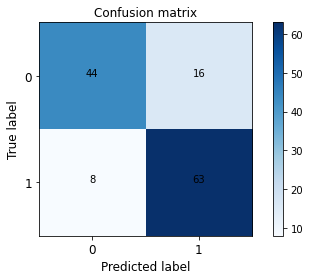

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        60
           1       0.80      0.89      0.84        71

    accuracy                           0.82       131
   macro avg       0.82      0.81      0.81       131
weighted avg       0.82      0.82      0.82       131



## 3) **kNN Classifier**

O kNN είναι ένας ταξινομητής βασισμένος σε παραδείγματα (instance-based). Η αρχή λειτουργίας του είναι πολύ απλή. Για ένα νέο δείγμα προς ταξινόμηση, πρώτα υπολογίζουμε τους k πλησιέστερους γείτονές του (στον ν-διάστατο χώρο των χαρακτηριστικών εισόδου) με βάση κάποια συνάρτηση απόστασης, συνήθως την ευκλείδεια:

$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$

Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων (διαλέγουμε k περιττό γενικά για να αποφύγουμε τυχόν 'ισοπαλίες'), είτε απλά υπολογισμένη (άθροισμα) είτε (αντίστροφα) ζυγισμένη με βάση την απόσταση του κάθε γείτονα. 

Ο kNN δεν έχει πρακτικά φάση εκπαίδευσης. Ωστόσο, για να ταξινομήσουμε ένα νέο δείγμα στην φάση test,  πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set. Αυτό σημαίνει ότι για την ταξινόμηση είναι απαραίτητα όλα τα δείγματα εκπαίδευσης (εξού και η ονομασία "instance-based", ενώ στον Naive Bayes χρειαζόμαστε μόνο τις παραμέτρους $μ$ και $σ^2$). Αυτό σημαίνει ότι ο kNN είναι πιο απαιτητικός και σε χώρο (αποθήκευση όλων των δειγμάτων) και σε χρόνο (υπολογισμός όλων των αποστάσεων για κάθε νέο δείγμα).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracies['Knn'] = knn.score(X_test, y_test)
f1_micros['Knn'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros['Knn'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros['Knn']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros['Knn']*100))

F1-micro average score is: 67.93893129770993 %
F1-macro average score is: 67.0933014354067 %


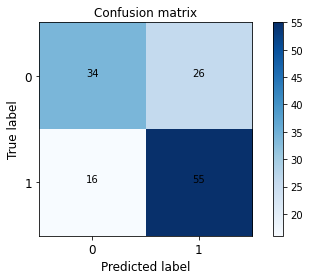

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62        60
           1       0.68      0.77      0.72        71

    accuracy                           0.68       131
   macro avg       0.68      0.67      0.67       131
weighted avg       0.68      0.68      0.68       131



## Μετρικές **f1-micro average** και **f1-macro average**

Τα λεξικά **f1_micros** και **f1_macros** περιέχουν τώρα τo f1 score για κάθε ταξινομητή με average micro και macro αντίστοιχα. Για τη διαδικασία σύγκρισης τυπώνουμε το όνομα του κάθε ταξινομητή καθώς και το αντίστοιχο score του, ταξινομώντας τους σε φθίνουσα σειρά ακρίβειας.

In [ ]:
print("\033[1mClassification on the Japanese Credit Screening Data Set\n")
print("------------------------ f1 micro average ------------------------\n")
sorted_f1_micros = [(k, f1_micros[k]) for k in sorted(f1_micros, key=f1_micros.get, reverse=True)]
for k, v in sorted_f1_micros:
    print("\033[1m",k,":\033[0m",v)
print()
print("\033[1m------------------------ f1 macro average ------------------------\n")
sorted_f1_macros = [(k, f1_macros[k]) for k in sorted(f1_macros, key=f1_macros.get, reverse=True)]
for m, n in sorted_f1_macros:
    print("\033[1m",m,":\033[0m",n)

Classification on the Japanese Credit Screening Data Set

------------------------ f1 micro average ------------------------

 GaussianNB : 0.816793893129771
 Knn : 0.6793893129770993
 uniform (random) : 0.5419847328244275
 Constant 1 : 0.5419847328244275
 Most frequent label : 0.5419847328244275
 Stratified : 0.48854961832061067
 Constant 0 : 0.4580152671755725

------------------------ f1 macro average ------------------------

 GaussianNB : 0.8128571428571428
 Knn : 0.670933014354067
 uniform (random) : 0.5398126463700235
 Stratified : 0.4866350821781599
 Constant 1 : 0.35148514851485146
 Most frequent label : 0.35148514851485146
 Constant 0 : 0.31413612565445026


## Bar plot σύγκρισης ταξινομητών

Για λόγους σύγκρισης και πάλι τυπώνουμε στο ίδιο bar plot τις τιμές του f1-score για κάθε averaged metric (micro / macro) όλων των ταξινομητών που μελετήσαμε προηγουμένως. 

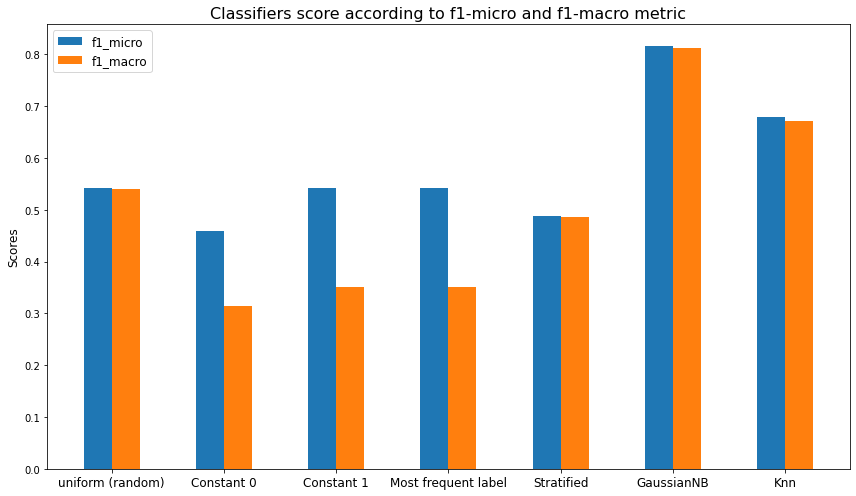

In [ ]:
classifiers = list(accuracies.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, list(f1_micros.values()), width, label='f1_micro')
rects2 = ax.bar(x + width/2, list(f1_macros.values()), width, label='f1_macro')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Classifiers score according to f1-micro and f1-macro metric',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=12)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

Παρατηρούμε ότι ο ταξινομητής GaussianNB παρά την μη-ρεαλιστική υπόθεση που κάνει για την ανεξαρτησία των χαρακτηριστικών κατηγοριοποιεί αρκετά ικανοποιητικά τα test δεδομένα. Δεδομένου και του γεγονότος ότι ο συγκεκριμένος ταξινομητής δεν διαθέτει παραμέτρους προς βελτιστοποίηση, αναμένουμε μικρή βελτίωση κατά την διαδικασία hyperparameter tuning σε επόμενο βήμα. Την δεύτερη υψηλότερη ακρίβεια εμφανίζει ο Knn. Τέλος, αναφορικά με τους dummy classifiers την καλύτερη επίδοση φαίνεται να έχει η στρατηγική Most frequent label (η οποία εδώ συμπίπτει με την Constant 1) κατά την οποία κάθε φορά επιλέγεται η πιο συχνή κλάση.

# Βελτιστοποίηση ταξινομητών

Για την βελτιστοποίηση των ταξινομητών και την ρύθμιση των υπερπαραμέτρων τους (εφόσον αυτοί έχουν) χρησιμοποιούμε τη μέθοδο της διασταυρούμενης επικύρωσης (**Cross Validation**). Στο Cross Validation αρχικά χωρίζουμε το training set σε έναν αριθμό "πτυχών" (folds). Για το συγκεκριμένο dataset δουλεύουμε με σχήμα **10-fold**. Στη συνέχεια, για κάθε k-fold, θεωρούμε ότι τα k μείον 1 folds είναι training set και ότι το fold που αφήσαμε έξω είναι το test set. Υπολογίζουμε τη μετρική σφάλματός μας στο test set που ορίζει το fold. Επαναλαμβάνουμε τη διαδικασία για τα k folds για κάθε τιμή των υπερπαραμέτρων και υπολογίζουμε τη μέση τιμή της μετρικής του σφάλματος. Με αυτό τον τρόπο, αφενός είμαστε αμερόληπτοι στην αξιολόγηση αφήνοντας τελείως έξω το test set και αφετέρου χρησιμοποιούμε αποτελεσματικά τα δεδομένα εκπαίδευσης: τα χρησιμοποιούμε όλα και παίρνοντας τη μέση τιμή εξαλείφουμε πιθανές ανωμαλίες στα δεδομένα.
<center>
<img src="https://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png" alt="Cross Validation" border="0"  height="350" width="600">
</center>


Για κάθε ταξινομητή, με εξαίρεση τους dummy, βελτιστοποιούμε την απόδοσή του στο training set μέσω της διαδικασίας προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων (τόσο των ταξινομητών όσο και των μετασχηματιστών). Συγκεκριμένα οι παράμετροι που βελτιστοποιούμε είναι:



1.   **Παράμετροι μετασχηματιστών**: Το κατώφλι **threshold** για τον **VarianceThreshold** selector και ο αριθμός **n_components** για τον **PCA**.
2.   **Παράμετροι ταξινομητών**: Μόνο ο **kNN** έχει υπερπαραμέτρους προς βελτιστοποίηση μεταξύ των οποίων εξετάζουμε μόνο τον αριθμό **n_neighbors** των κοντινότερων γειτόνων στο training set που λαμβάνουμε υπόψην για την ταξινόμηση ενός νέου δείγματος στο test set.





In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

import time
import re

# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
var_selector = VarianceThreshold()
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
pca = PCA()
knn = KNeighborsClassifier()
gnb = GaussianNB()

Για την εύρεση των βέλτιστων παραμέτρων που αναφέραμε, ορίζουμε τη συνάρτηση **gridsearch**. Η συνάρτηση αυτή δέχεται ως όρισμα τον εκάστοτε ταξινομητή καθώς και όποιους μετασχηματιστές επιθυμούμε (μεταξύ των MinMax scaler, Standard scaler, Variance Threshold και PCA) μαζί με τις αντίστοιχες παραμέτρους, ενώ δέχεται και τη μετρική απόδοσης. Ανάλογα με τα δοθέντα ορίσματα, η συνάρτηση δημιουργεί την αρχιτεκτονική του pipeline μετασχηματιστών-εκτιμητή και αποθηκεύει σε ένα dictionary τις αντίστοιχες τιμές παραμέτρων. Με χρήση της συνάρτησης **Pipeline** της imblearn κατασκευάζεται το τελικό pipe, το οποίο μαζί με το dictionary παραμέτρων δίνονται ως ορίσματα στην **GridSearchCV** της βιβλιοθήκης sklearn. Στη συνάρτηση επίσης μεταβιβάζεται η μετρική απόδοσης scoring, ο αριθμός των folds του cv ενώ τίθεται η παράμετρος n_jobs=-1 ώστε να χρησιμοποιούνται όλοι οι πυρήνες του υπολογιστή (το default είναι 1). Η συνάρτηση εξετάζει όλους τους δυνατούς συνδυασμούς υπερπαραμέτρων εντοπίζοντας το καλύτερο μοντέλο. Τελικά, η **gridsearch** επιστρέφει ένα λεξικό με τα ονόματα και τις αντίστοιχες τιμές των βέλτιστων υπερπαραμέτρων. 

In [ ]:
def gridsearch(clf,selector = None,selector_components = [],scaler = None,dim_reduct = None,dim_reduct_components = [], n_neighbors_components = [],scoring_metric = 'f1_macro'):
    pipe_arch = []
    grid_components = {}
    if selector is not None:
       pipe_arch.append(('selector',selector))
       grid_components['selector__threshold'] = selector_components
    if scaler is not None:
       pipe_arch.append(('scaler',scaler))
       if scaler == min_max_scaler: pipe_arch.reverse()
    if dim_reduct is not None:
       pipe_arch.append(('dim_reduct',dim_reduct))
       grid_components['dim_reduct__n_components'] = dim_reduct_components
    pipe_arch.append(('clf',clf))
    if str(clf) == "KNeighborsClassifier()":
        grid_components['clf__n_neighbors'] = n_neighbors_components
    pipe = Pipeline(steps=pipe_arch)
    estimator = GridSearchCV(pipe, grid_components, cv=10, scoring=scoring_metric, n_jobs=-1)
    start_time = time.time()
    estimator.fit(X_train, y_train)
    print("Best parameters for optimal estimator are: \033[1m{}\033[0m".format(estimator.best_params_))
    print("Best mean cross validation score for optimal estimator is \033[1m{} %".format(estimator.best_score_*100))
    pipeline_arch = '-'.join([str(elem[1]) for elem in pipe_arch]) 
    pipeline_arch = re.sub('[()]', '', pipeline_arch)
    f1_scores[pipeline_arch] = estimator.best_score_*100
    best_parameters[pipeline_arch] = estimator.best_params_
    return estimator.best_params_

Οι μετρικές απόδοσης που χρησιμοποιούνται στο cross-validation για την εύρεση των βέλτιστων τιμών των υπερπαραμέτρων (ταξινομητών και μετασχηματιστών) είναι οι f1-micro και f1-macro. Ανάλογα με την μετρική προκύπτει διαφορετικό βέλτιστο μοντέλο. Βέβαια για μικρά datasets όπως το δικό μας αναμένουμε να καταλήξουμε σε παραπλήσιες (αν όχι ίδιες) βέλτιστες τιμές. Για κάθε μετρική ορίζουμε αρχικά δύο λεξικά **f1_scores** και **best_parameters** με κλειδιά όλες τις αρχιτεκτονικές pipeline που εξετάζουμε και τιμές τις μέσες τιμές των μετρικών απόδοσης των βέλτιστων ταξινομητών και τις παραμέτρους τους αντίστοιχα. Η συμπλήρωση των λεξικών αυτών γίνεται εντός της συνάρτησης **gridsearch** που περιγράφουμε παραπάνω. Επιπλέον, ορίζουμε για κάθε συνδυασμό μετρικής απόδοσης (f1-micro ή f1-macro) και ταξινομητή (Gaussian, kNN) μία λίστα η οποία πρόκειται να περιέχει τις τιμές των βέλτιστων υπερπαραμέτρων που θα προκύψουν.


Στη συνέχεια, ακολουθείται μια **bottom-up** διαδικασία η οποία είναι ίδια για κάθε ταξινομητή και περιλαμβάνει τα ακόλουθα βήματα. Αρχικά, ξεκινάμε μόνο με τον εκτιμητή και στη συνέχεια προσθέτουμε μετασχηματιστές παρακολουθώντας την επίδραση τους στις επιδόσεις, πάντα με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση. Συνολικά επομένως για κάθε μετρική απόδοσης (f1-micro/macro) επιλέγουμε διαφορετικές αρχιτεκτονικές pipeline τις οποίες εξετάζουμε σειριακά μέσω της gridsearch προκειμένου να βρούμε τις βέλτιστες παραμέτρους τους και το αντίστοιχο cross validation score. Στο πεδίο ορισμού των παραμέτρων, ξεκινάμε με μεγάλα διαστήματα και σχετικά μεγάλο βήμα. Για τις αρχιτεκτονικές εκείνες οι οποίες εμφανίζουν τα πιο υψηλά crossvalidation scores μικραίνουμε το διάστημα του grid search γύρω από τις προηγούμενες βέλτιστες τιμές και εφαρμόζουμε ένα σχετικά μικρό βήμα. Οι τιμές αυτές λαμβάνονται **παραμετρικά** από το λεξικό επιστροφής της αμέσως προηγούμενης κλήσης της συνάρτησης **gridsearch**. Με τον τρόπο αυτό εξασφαλίζουμε ότι είτε θα βελτιστοποιήσουμε περαιτέρω τον εκτιμητή είτε σε περίπτωση που αυτός δεν βελτιστοποιηθεί θα είμαστε σίγουροι ότι βρισκόμαστε σε ένα καλό τοπικό μέγιστο της συνάρτησης αξιολόγησης.

Σημειώνουμε πως **δεν** προσδιορίσαμε κάποιο **random_state** κατά την κλήση της συνάρτησης **train_test_split**. Επομένως σε κάθε τρέξιμο του κώδικα γίνεται διαφορετικός διαμοιρασμός δειγμάτων σε train και test set και άρα ενδέχεται να διαφέρουν οι βέλτιστες αρχιτεκτονικές και οι υπερπαράμετροί τους. 




## 1) **Dummy Classifier**

Στην ενότητα αυτή δεν θα ασχοληθούμε με τους Dummy Classifiers καθώς πραγματοποιούν μια "αφελή" διαδικασία ταξινόμησης η οποία δεν επιδέχεται κάποιου είδους βελτιστοποίηση.

 ## 2) **Gaussian Naive Bayes Classifier**

Ο Gaussian Naive Bayes ταξινομητής **δεν** έχει υπερπαραμέτρους. Συνεπώς, στις αρχιτεκτονικές εκείνες οι οποίες περιέχουν μόνο τον ταξινομητή ή τον ταξινομητή μαζί με κάποιο μετασχηματιστή κανονικοποίησης των δεδομένων (Standrard / MinMax Scaler) **δεν** χρησιμοποιούμε την **gridsearch** καθώς δεν υπάρχουν υπερπαράμετροι προς βελτιστοποίηση. Ωστόσο, εφαρμόζουμε **cross- validation** μέσω της έτοιμης συνάρτησης **cross_val_score** της **sklearn** προκειμένου να λάβουμε μια πιο αντιπροσωπευτική τιμή για την απόδοση του μοντέλου μας καθώς αυτό αξιολογείται σε 10 διαφορετικά σύνολα δοκιμής. Αντιθέτως, όταν αξιολογούμε το μοντέλο σε ένα test set (το αρχικό που προκύπτει κατά τον διαχωρισμό των δεδομένων) λαμβάνουμε μία μετρική απόδοσης η οποία δεν είναι πλήρως αντιπροσωπευτική. Το αποτέλεσμα αυτό μπορεί να είναι τυχαίο ή να επηρεάζεται από bias των test δεδομένων. Επομένως, με χρήση του **cross-validation** επιτυγχάνουμε μία μεγαλύτερη συνοχή και ισορροπία στα δεδομένα μας και κατά συνέπεια εξασφαλίζουμε ένα μοντέλο που μπορεί να λύνει πιο αποτελεσματικά το γενικό πρόβλημα κατηγοριοποίησης. 

### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-micro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_gnb_f1_micro_parameters = []

#### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=10, scoring='f1_micro')
f1_scores['GaussianNB'] = scores.mean()*100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 84.47387518142234 % 


#### StandardScaler - Gaussian Naive Bayes

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=10, scoring='f1_micro')
f1_scores['StandardScaler-GaussianNB'] = scores.mean() * 100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 64.1799709724238 % 


#### MinMaxScaler - Gaussian Naive Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=10, scoring='f1_micro')
f1_scores['MinMaxScaler-GaussianNB'] = scores.mean() * 100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 66.47677793904208 % 


#### VarianceThreshold - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'selector__threshold': 0.023}
Best mean cross validation score for optimal estimator is 84.66618287373005 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'selector__threshold': 0.027}
Best mean cross validation score for optimal estimator is 84.66618287373005 %


#### StandardScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 79.88388969521046 %


#### MinMaxScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 86.01959361393325 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']

best_param = gridsearch(clf = GaussianNB(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 8}
Best mean cross validation score for optimal estimator is 86.40420899854864 %


#### VarianceThreshold - StandardScaler - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = standard_scaler,
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'selector__threshold': 0.045}
Best mean cross validation score for optimal estimator is 85.04354136429609 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = standard_scaler,
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'selector__threshold': 0.049}
Best mean cross validation score for optimal estimator is 84.6589259796807 %


#### MinMaxScaler- VarianceThreshold  - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                         selector = var_selector,
                         selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                         scaler = min_max_scaler, 
                         scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'selector__threshold': 0.067}
Best mean cross validation score for optimal estimator is 87.16618287373004 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                         selector = var_selector,
                         selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                         scaler = min_max_scaler, 
                         scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'selector__threshold': 0.071}
Best mean cross validation score for optimal estimator is 86.58925979680696 %


#### VarianceThreshold - StandardScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 10, 'selector__threshold': 0.067}
Best mean cross validation score for optimal estimator is 84.6734397677794 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 6, 'selector__threshold': 0.205}
Best mean cross validation score for optimal estimator is 84.48113207547169 %


#### MinMaxScaler- VarianceThreshold - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                         selector = var_selector,
                         selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                         scaler = min_max_scaler, 
                         dim_reduct = pca, 
                         dim_reduct_components = [10,20,30,40],
                         scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 10, 'selector__threshold': 0.001}
Best mean cross validation score for optimal estimator is 86.01959361393325 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                         selector = var_selector,
                         selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                         scaler = min_max_scaler, 
                         dim_reduct = pca, 
                         dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                         scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 8, 'selector__threshold': 0.004}
Best mean cross validation score for optimal estimator is 86.40420899854864 %


#### Επιλογή βέλτιστου ταξινομητή

Για την επιλογή του βέλτιστου ταξινομητή βρίσκουμε αρχικά την μέγιστη τιμή απόδοσης που περιέχεται στο λεξικό **f1_scores**. Στη συνέχεια, αποθηκεύουμε στην λίστα με τις καλύτερες αρχιτεκτονικές για τον συγκεκριμένο ταξινομητή όλα εκείνα τα pipelines για τα οποία η απόδοση ισούται με την τιμή αυτή. Για κάθε ένα από τα βέλτιστα αυτά pipelines τυπώνουμε τις παραμέτρους τους, οι οποίες βρίσκονται στο dictionary **best_parameters**.

In [ ]:
best_f1_micro = max(f1_scores.values())            
best_gnb_f1_micro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_micro]    # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_micro average {}% \033[0mis/are:\033[1m\n".format(best_f1_micro)) 
for pipeline in best_gnb_f1_micro_pipelines:
    best_gnb_f1_micro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_micro average 86.58925979680696% is/are:

MinMaxScaler-VarianceThreshold-GaussianNB with parameters: {'selector__threshold': 0.071}


### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-macro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_gnb_f1_macro_parameters = []

#### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=10, scoring='f1_macro')
f1_scores['GaussianNB'] = scores.mean()*100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 84.0909706610226 % 


#### StandardScaler - Gaussian Naive Bayes

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=10, scoring='f1_macro')
f1_scores['StandardScaler-GaussianNB'] = scores.mean() * 100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 55.020777080762265 % 


#### MinMaxScaler - Gaussian Naive Bayes

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scores = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=10, scoring='f1_macro')
f1_scores['MinMaxScaler-GaussianNB'] = scores.mean() * 100
print("Best mean cross validation score for estimator is \033[1m{} % \033[0m".format(scores.mean()*100))

Best mean cross validation score for estimator is 59.47767037220474 % 


#### VarianceThreshold - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'selector__threshold': 0.023}
Best mean cross validation score for optimal estimator is 84.31189876774083 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'selector__threshold': 0.027}
Best mean cross validation score for optimal estimator is 84.31189876774083 %


#### StandardScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 78.6395810905464 %


#### MinMaxScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 85.75087868029536 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']

best_param = gridsearch(clf = GaussianNB(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 8}
Best mean cross validation score for optimal estimator is 86.22661532063363 %


#### VarianceThreshold - StandardScaler - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = standard_scaler,
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'selector__threshold': 0.056}
Best mean cross validation score for optimal estimator is 84.74495935726688 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = standard_scaler,
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'selector__threshold': 0.06}
Best mean cross validation score for optimal estimator is 84.73706349340085 %


#### MinMaxScaler- VarianceThreshold  - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                         selector = var_selector,
                         selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                         scaler = min_max_scaler, 
                         scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'selector__threshold': 0.067}
Best mean cross validation score for optimal estimator is 86.91634623497526 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                         selector = var_selector,
                         selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                         scaler = min_max_scaler, 
                         scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'selector__threshold': 0.071}
Best mean cross validation score for optimal estimator is 86.38252466216822 %


#### VarianceThreshold - StandardScaler - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 10, 'selector__threshold': 0.067}
Best mean cross validation score for optimal estimator is 84.42833368598232 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 6, 'selector__threshold': 0.205}
Best mean cross validation score for optimal estimator is 84.20665321013374 %


#### MinMaxScaler- VarianceThreshold - PCA - Gaussian Naive Bayes

In [ ]:
best_param = gridsearch(clf = GaussianNB(),
                         selector = var_selector,
                         selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                         scaler = min_max_scaler, 
                         dim_reduct = pca, 
                         dim_reduct_components = [10,20,30,40],
                         scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 10, 'selector__threshold': 0.067}
Best mean cross validation score for optimal estimator is 85.78142052232114 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
thresh = best_param['selector__threshold']

best_param = gridsearch(clf = GaussianNB(),
                         selector = var_selector,
                         selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                         scaler = min_max_scaler, 
                         dim_reduct = pca, 
                         dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                         scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'dim_reduct__n_components': 8, 'selector__threshold': 0.004}
Best mean cross validation score for optimal estimator is 86.22661532063363 %


#### Επιλογή βέλτιστου ταξινομητή

In [ ]:
best_f1_macro = max(f1_scores.values())          
best_gnb_f1_macro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_macro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_macro average {}% \033[0mis/are:\033[1m\n".format(best_f1_macro)) 
for pipeline in best_gnb_f1_macro_pipelines:
    best_gnb_f1_macro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_macro average 86.38252466216822% is/are:

MinMaxScaler-VarianceThreshold-GaussianNB with parameters: {'selector__threshold': 0.071}


## 3) **kNN**

### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-micro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_knn_f1_micro_parameters = []

#### kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5}
Best mean cross validation score for optimal estimator is 68.02975326560232 %


#### StandardScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 33}
Best mean cross validation score for optimal estimator is 86.20827285921627 %


##### Progressive search

In [ ]:
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 33}
Best mean cross validation score for optimal estimator is 86.20827285921627 %


#### MinMaxScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 9}
Best mean cross validation score for optimal estimator is 87.55805515239476 %


##### Progressive search

In [ ]:
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 9}
Best mean cross validation score for optimal estimator is 87.55805515239476 %


#### VarianceThreshold - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5, 'selector__threshold': 0.001}
Best mean cross validation score for optimal estimator is 68.02975326560232 %


#### StandardScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 33, 'dim_reduct__n_components': 30}
Best mean cross validation score for optimal estimator is 86.20827285921627 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 35, 'dim_reduct__n_components': 28}
Best mean cross validation score for optimal estimator is 86.59288824383165 %


#### MinMaxScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 88.1277213352685 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 88.1277213352685 %


#### VarianceThreshold - StandardScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 41, 'selector__threshold': 0.067}
Best mean cross validation score for optimal estimator is 87.54716981132076 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 47, 'selector__threshold': 0.071}
Best mean cross validation score for optimal estimator is 86.97024673439768 %


#### MinMaxScaler- VarianceThreshold  - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 9, 'selector__threshold': 0.001}
Best mean cross validation score for optimal estimator is 87.55805515239476 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 7, 'selector__threshold': 0.008}
Best mean cross validation score for optimal estimator is 87.94629898403483 %


#### VarianceThreshold - StandardScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 25, 'dim_reduct__n_components': 10, 'selector__threshold': 0.089}
Best mean cross validation score for optimal estimator is 87.55079825834544 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 19, 'dim_reduct__n_components': 16, 'selector__threshold': 0.093}
Best mean cross validation score for optimal estimator is 86.97387518142236 %


#### MinMaxScaler- VarianceThreshold - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10, 'selector__threshold': 0.001}
Best mean cross validation score for optimal estimator is 88.1277213352685 %


##### Progressive search 

In [ ]:
thresh = best_param['selector__threshold']
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_micro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10, 'selector__threshold': 0.004}
Best mean cross validation score for optimal estimator is 88.1277213352685 %


#### Επιλογή βέλτιστου ταξινομητή

In [ ]:
best_f1_micro = max(f1_scores.values())          
best_knn_f1_micro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_micro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_micro average {}% \033[0mis/are:\033[1m\n".format(best_f1_micro)) 
for pipeline in best_knn_f1_micro_pipelines:
    best_knn_f1_micro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_micro average 88.1277213352685% is/are:

MinMaxScaler-PCA-KNeighborsClassifier with parameters: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10}
MinMaxScaler-VarianceThreshold-PCA-KNeighborsClassifier with parameters: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10, 'selector__threshold': 0.004}


### Βελτιστοποίηση ταξινομητή με βάση τη μετρική F1-macro average

In [ ]:
f1_scores = {}
best_parameters = {}
best_knn_f1_macro_parameters = []

#### kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5}
Best mean cross validation score for optimal estimator is 66.87321859441685 %


#### StandardScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 33}
Best mean cross validation score for optimal estimator is 85.84112115089823 %


##### Progressive search

In [ ]:
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 33}
Best mean cross validation score for optimal estimator is 85.84112115089823 %


#### MinMaxScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 9}
Best mean cross validation score for optimal estimator is 87.39527187853884 %


##### Progressive search

In [ ]:
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
           scaler = min_max_scaler, 
           n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
           scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 9}
Best mean cross validation score for optimal estimator is 87.39527187853884 %


#### VarianceThreshold - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 1, 'selector__threshold': 0.089}
Best mean cross validation score for optimal estimator is 67.17674362462593 %


#### StandardScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 33, 'dim_reduct__n_components': 30}
Best mean cross validation score for optimal estimator is 85.84112115089823 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 35, 'dim_reduct__n_components': 28}
Best mean cross validation score for optimal estimator is 86.25641714016447 %


#### MinMaxScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 87.99399923130797 %


##### Progressive search

In [ ]:
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10}
Best mean cross validation score for optimal estimator is 87.99399923130797 %


#### VarianceThreshold - StandardScaler - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 41, 'selector__threshold': 0.067}
Best mean cross validation score for optimal estimator is 87.28904666698736 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = standard_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 47, 'selector__threshold': 0.071}
Best mean cross validation score for optimal estimator is 86.61014115359824 %


#### MinMaxScaler- VarianceThreshold  - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 9, 'selector__threshold': 0.001}
Best mean cross validation score for optimal estimator is 87.39527187853884 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = min_max_scaler, 
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 7, 'selector__threshold': 0.008}
Best mean cross validation score for optimal estimator is 87.7720323260855 %


#### VarianceThreshold - StandardScaler - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 21, 'dim_reduct__n_components': 20, 'selector__threshold': 0.067}
Best mean cross validation score for optimal estimator is 87.32271887529663 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = standard_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 23, 'dim_reduct__n_components': 18, 'selector__threshold': 0.071}
Best mean cross validation score for optimal estimator is 86.71824047262774 %


#### MinMaxScaler- VarianceThreshold - PCA - kNN

In [ ]:
best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.linspace(1e-3,1e-1,10),3)),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [10,20,30,40],
                        n_neighbors_components = list(range(1,54,4)),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10, 'selector__threshold': 0.001}
Best mean cross validation score for optimal estimator is 87.99399923130797 %


##### Progressive search

In [ ]:
thresh = best_param['selector__threshold']
dim = best_param['dim_reduct__n_components']
n = best_param['clf__n_neighbors']

best_param = gridsearch(clf = KNeighborsClassifier(),
                        selector = var_selector,
                        selector_components = list(np.round(np.arange(max(thresh-10*thresh,0.004),thresh+10*thresh+thresh,thresh),3)),
                        scaler = min_max_scaler, 
                        dim_reduct = pca, 
                        dim_reduct_components = [dim-6,dim-4,dim-2,dim,min(dim+2,46),min(dim+4,46),min(dim+6,46)],
                        n_neighbors_components = list(dict.fromkeys([max(n-6,1),max(n-4,1),max(n-2,1),n,n+2,n+4,n+6])),
                        scoring_metric = 'f1_macro')

Best parameters for optimal estimator are: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10, 'selector__threshold': 0.004}
Best mean cross validation score for optimal estimator is 87.99399923130797 %


#### Επιλογή βέλτιστου ταξινομητή

In [ ]:
best_f1_macro = max(f1_scores.values())          
best_knn_f1_macro_pipelines = [pipe for pipe,score in f1_scores.items() if score == best_f1_macro]                          # getting all pipelines containing the maximum score
print("The best pipeline/pipelines with \033[1mf1_macro average {}% \033[0mis/are:\033[1m\n".format(best_f1_macro)) 
for pipeline in best_knn_f1_macro_pipelines:
    best_knn_f1_macro_parameters.append(best_parameters[pipeline])
    print(pipeline,"\033[0mwith parameters:\033[1m",best_parameters[pipeline])

The best pipeline/pipelines with f1_macro average 87.99399923130797% is/are:

MinMaxScaler-PCA-KNeighborsClassifier with parameters: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10}
MinMaxScaler-VarianceThreshold-PCA-KNeighborsClassifier with parameters: {'clf__n_neighbors': 5, 'dim_reduct__n_components': 10, 'selector__threshold': 0.004}


# Αξιολόγηση βέλτιστων ταξινομητών

Για την αξιολόγηση των βέλτιστων ταξινομητών ορίζουμε την συνάρτηση **evaluate_optimal_clf** η οποία δέχεται για ορίσματα τον ταξινομητή και δύο λίστες με τα καλύτερα pipelines και τις τιμές των υπερπαραμέτρων τους αντίστοιχα (για μία συγκεκριμένη μετρική απόδοσης). Για κάθε βέλτιστο pipeline βρίσκουμε τους μετασχηματιστές και τον ταξινομητή που το αποτελούν. Στη συνέχεια, ορίζουμε κάθε έναν από αυτούς δίνοντας σαν παραμέτρους τις βέλτιστες τιμές που υπολογίσαμε προηγουμένως και αποθηκεύσαμε στην λίστα **best_clf_parameters**. Έπειτα, εφαρμόζουμε διαδοχικά στα δεδομένα μας τους παραπάνω μετασχηματισμούς με την σειρά με την οποία εμφανίζονται στο pipe και εκπαιδεύουμε στα μετασχηματισμένα (αν υπάρχει κάποιο transformation) train δεδομένα τον ταξινομητή με τη μέθοδο **fit**. Σημειώνουμε πως η σειρά των μετασχηματιστών είναι πάντα της μορφής (επιλογή χαρακτηριστικών, κανονικοποίηση, εξαγωγή χαρακτηριστικών, ταξινομητής) εκτός της περίπτωσης εφαρμογής variance threshold και min max scaler όπου πρέπει πρώτα να γίνει κανονικοποίηση και μετά επιλογή χαρακτηριστικών. Με την μέθοδο **predict** παράγουμε τις προβλέψεις για τα (μετασχηματισμένα) δεδομένα ελέγχου, ενώ με την **score** υπολογίζουμε το accuracy του βελτιστοποιημένου πλέον ταξινομητή.
Για το τελικό fit του ταξινομητή στο σύνολο του training set και για το predict στο test set φροντίζουμε ώστε να αποθηκεύουμε στα λεξικά **fit_times** και **pred_times** τους αντίστοιχους χρόνους εκτέλεσης.


  

In [ ]:
def evaluate_optimal_clf(clf,best_clf_pipelines, best_clf_parameters):
    for i, pipe in enumerate(best_clf_pipelines):
        pipeline = list(pipe.split("-"))
        must_reverse = False
        if 'MinMaxScaler' in pipeline:
            scaler = MinMaxScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        elif 'StandardScaler' in pipeline:
            scaler = StandardScaler()
            if 'VarianceThreshold' in pipeline:
                must_reverse = True
            else: 
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
        else: 
            X_train_scaled = X_train
            X_test_scaled = X_test

        if 'VarianceThreshold' in pipeline:
            selector = VarianceThreshold(threshold=best_clf_parameters[i]['selector__threshold'])
            if not must_reverse: # MinMaxScaler or no Scaler
              X_train_var = selector.fit_transform(X_train_scaled)
              X_test_var = selector.transform(X_test_scaled)
            else: # StandardScaler
              X_train_var = selector.fit_transform(X_train)
              X_test_var = selector.transform(X_test)
              X_train_var = scaler.fit_transform(X_train_var)
              X_test_var = scaler.transform(X_test_var)
        else: 
            X_train_var = X_train_scaled
            X_test_var = X_test_scaled

        if 'PCA' in pipeline:
            dim_reduct = PCA(n_components = best_clf_parameters[i]['dim_reduct__n_components'])
            X_train_red = dim_reduct.fit_transform(X_train_var)
            X_test_red = dim_reduct.transform(X_test_var)
        else: 
            X_train_red = X_train_var
            X_test_red = X_test_var

        if clf == "KNeighborsClassifier":
            clf_ = KNeighborsClassifier(n_neighbors = best_clf_parameters[i]['clf__n_neighbors'])
        elif clf == "GaussianNB":
            clf_ = GaussianNB()
        else: raise TypeError("Wrong Classifier")

        start_time = time.time()
        clf_.fit(X_train_red, y_train)
        fit_times[clf] = time.time() - start_time

        start_time = time.time()
        predictions = clf_.predict(X_test_red)
        pred_times[clf] = time.time() - start_time
        accuracy = clf_.score(X_test_red, y_test)
        return predictions, accuracy

## Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 micro

Προτού ορίσουμε τα μοντέλα μας, αρχικοποιούμε πέντε λεξικά, τα **accuracies_opt**, **f1_micros_opt**, **f1_macros_opt**, **fit_times** και **pred_times** τα οποία έχουν για κλειδιά τα ονόματα των ταξινομητών που μελετάμε και για τιμές την ακρίβεια, τις μετρικές f1-micro / macro average και τους τελικούς χρόνους fit και predict αντίστοιχα.

In [ ]:
accuracies_opt = {}
f1_micros_opt = {}
f1_macros_opt = {}
fit_times = {}
pred_times = {}

### 1) **Dummy Classifier**

#### i) Uniform

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
start_time = time.time()
dc_uniform.fit(X_train, y_train)
fit_times['uniform (random)'] = time.time() - start_time
start_time = time.time()
predictions = dc_uniform.predict(X_test)
pred_times['uniform (random)'] = time.time() - start_time
accuracies_opt['uniform (random)'] = dc_uniform.score(X_test,y_test)
f1_micros_opt['uniform (random)'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['uniform (random)'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['uniform (random)']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['uniform (random)']*100))

F1-micro average score is: 58.01526717557252 %
F1-macro average score is: 57.92700729927007 %


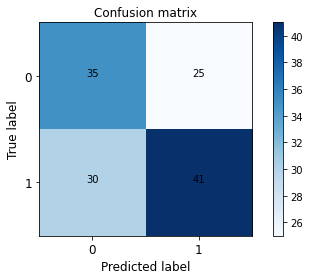

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        60
           1       0.62      0.58      0.60        71

    accuracy                           0.58       131
   macro avg       0.58      0.58      0.58       131
weighted avg       0.58      0.58      0.58       131



#### ii) Constant 0

In [ ]:
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
start_time = time.time()
dc_constant_0.fit(X_train, y_train)
fit_times['Constant 0'] = time.time() - start_time
start_time = time.time()
predictions = dc_constant_0.predict(X_test)
pred_times['Constant 0'] = time.time() - start_time
accuracies_opt['Constant 0'] = dc_constant_0.score(X_test,y_test)
f1_micros_opt['Constant 0'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Constant 0'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Constant 0']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Constant 0']*100))

F1-micro average score is: 45.80152671755725 %
F1-macro average score is: 31.413612565445025 %


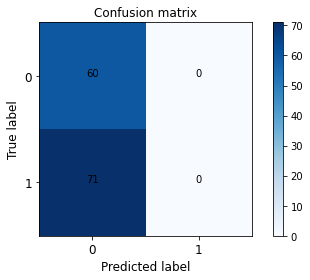

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        60
           1       0.00      0.00      0.00        71

    accuracy                           0.46       131
   macro avg       0.23      0.50      0.31       131
weighted avg       0.21      0.46      0.29       131



#### iii) Constant 1

In [ ]:
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
start_time = time.time()
dc_constant_1.fit(X_train, y_train)
fit_times['Constant 1'] = time.time() - start_time
start_time = time.time()
predictions = dc_constant_1.predict(X_test)
pred_times['Constant 1'] = time.time() - start_time
accuracies_opt['Constant 1'] = dc_constant_1.score(X_test,y_test)
f1_micros_opt['Constant 1'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Constant 1'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Constant 1']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Constant 1']*100))

F1-micro average score is: 54.19847328244275 %
F1-macro average score is: 35.148514851485146 %


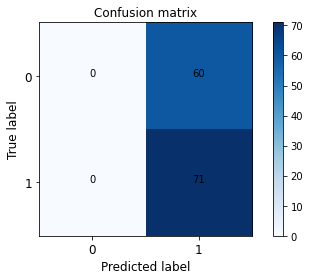

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.54      1.00      0.70        71

    accuracy                           0.54       131
   macro avg       0.27      0.50      0.35       131
weighted avg       0.29      0.54      0.38       131



#### iv) Most frequent

In [ ]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
start_time = time.time()
dc_most_frequent.fit(X_train, y_train)
fit_times['Most frequent label'] = time.time() - start_time
start_time = time.time()
predictions = dc_most_frequent.predict(X_test)
pred_times['Most frequent label'] = time.time() - start_time
accuracies_opt['Most frequent label'] = dc_most_frequent.score(X_test,y_test)
f1_micros_opt['Most frequent label'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Most frequent label'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Most frequent label']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Most frequent label']*100))

F1-micro average score is: 54.19847328244275 %
F1-macro average score is: 35.148514851485146 %


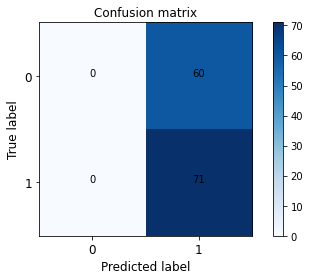

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.54      1.00      0.70        71

    accuracy                           0.54       131
   macro avg       0.27      0.50      0.35       131
weighted avg       0.29      0.54      0.38       131



#### v) Stratified

In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")
start_time = time.time()
dc_stratified.fit(X_train, y_train)
fit_times['Stratified'] = time.time() - start_time
start_time = time.time()
predictions = dc_stratified.predict(X_test)
pred_times['Stratified'] = time.time() - start_time
accuracies_opt['Stratified'] = dc_stratified.score(X_test,y_test)
f1_micros_opt['Stratified'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Stratified'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Stratified']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Stratified']*100))

F1-micro average score is: 49.61832061068702 %
F1-macro average score is: 49.11723163841808 %


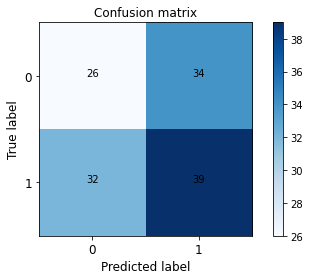

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44        60
           1       0.53      0.55      0.54        71

    accuracy                           0.50       131
   macro avg       0.49      0.49      0.49       131
weighted avg       0.49      0.50      0.50       131



### 2) **Gaussian Naive Bayes Classifier**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("GaussianNB",best_gnb_f1_micro_pipelines, best_gnb_f1_micro_parameters)
accuracies_opt['GaussianNB'] = accuracy
f1_micros_opt['GaussianNB'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['GaussianNB'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['GaussianNB']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['GaussianNB']*100))

F1-micro average score is: 87.02290076335878 %
F1-macro average score is: 86.91308691308691 %


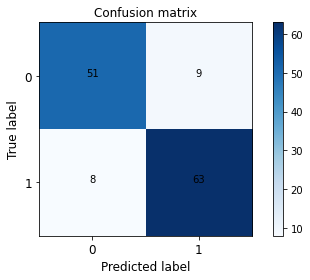

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        60
           1       0.88      0.89      0.88        71

    accuracy                           0.87       131
   macro avg       0.87      0.87      0.87       131
weighted avg       0.87      0.87      0.87       131





### 3) **kNN Classifier**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("KNeighborsClassifier",best_knn_f1_micro_pipelines, best_knn_f1_micro_parameters)
accuracies_opt['Knn'] = accuracy
f1_micros_opt['Knn'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Knn'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Knn']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Knn']*100))

F1-micro average score is: 90.83969465648855 %
F1-macro average score is: 90.79625292740047 %


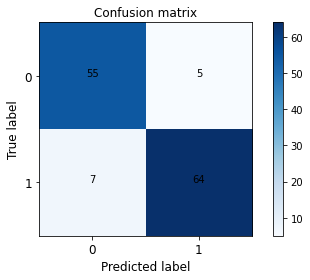

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        60
           1       0.93      0.90      0.91        71

    accuracy                           0.91       131
   macro avg       0.91      0.91      0.91       131
weighted avg       0.91      0.91      0.91       131



### Bar plots σύγκρισης βέλτιστων ταξινομητών

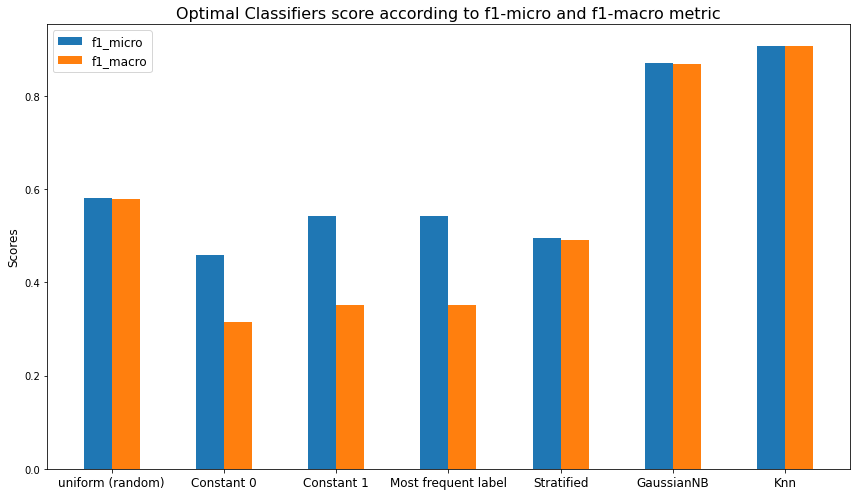

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, list(f1_micros_opt.values()), width, label='f1_micro')
rects2 = ax.bar(x + width/2, list(f1_macros_opt.values()), width, label='f1_macro')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Optimal Classifiers score according to f1-micro and f1-macro metric',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=12)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

Classifier | F1-micro (%) | F1-macro (%)
--- | :---: | :--:
**Knn** | **90.84** | **90.80**
**GaussianNB** | **87.02** | **86.91**
Uniform | 58.02 | 57.93
Most frequent | 54.20 | 35.15
Constant 1 | 54.20 | 35.15
Stratified | 49.62 | 49.12
Constant 0 | 45.80 | 31.41

Παρατηρούμε ότι το μεγαλύτερο ποσοστό ακρίβειας τόσο για την μετρική f1-micro όσο και για την f1-macro λαμβάνεται με χρήση του ταξινομητή **Knn**. Αυτό επιτυγχάνεται εφαρμόζοντας αρχικά ένα scaling στα δεδομένα (MinMaxScaler) και επακόλουθη μείωση διαστατικότητας σε 10 συνιστώσες (PCA). Αντίστοιχα, μία μικρότερη αύξηση εμφανίζει και ο ταξινομητής **Gaussian Naive Bayes** μετά από scaling (MinMaxScaler) των δεδομένων και εφαρμογή κατάλληλου κατωφλίου Variance Threshold.

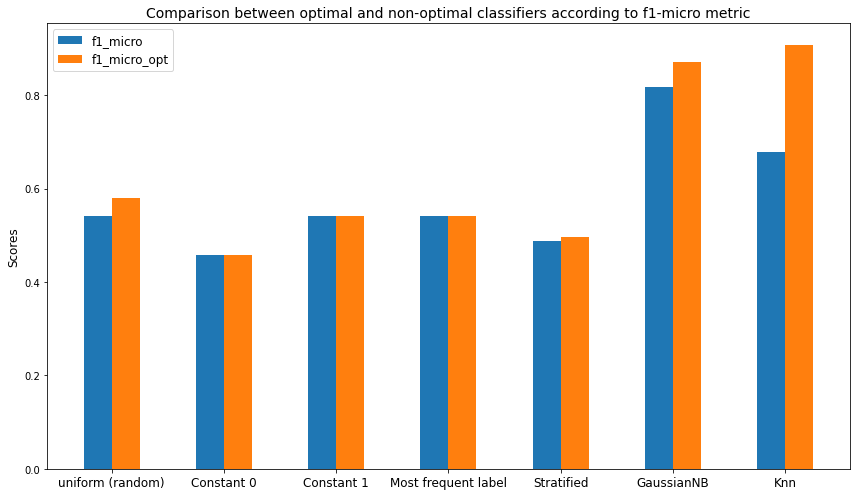

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, list(f1_micros.values()), width, label='f1_micro')
rects2 = ax.bar(x + width/2, list(f1_micros_opt.values()), width, label='f1_micro_opt')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Comparison between optimal and non-optimal classifiers according to f1-micro metric',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=12)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

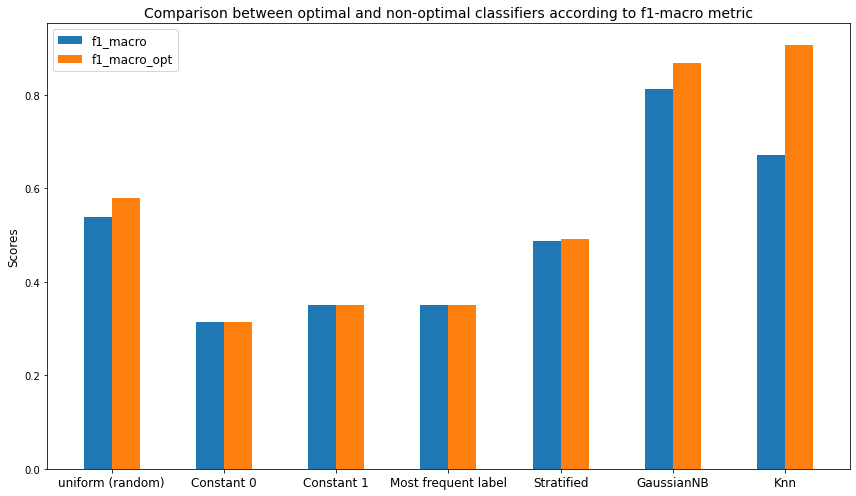

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, list(f1_macros.values()), width, label='f1_macro')
rects2 = ax.bar(x + width/2, list(f1_macros_opt.values()), width, label='f1_macro_opt')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Comparison between optimal and non-optimal classifiers according to f1-macro metric',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=12)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

### Μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους

In [ ]:
print("\033[1mIncrement of Accuracy between Optimal and Non-Optimal Classifiers:\n")
print("------------------------ accuracy differences ------------------------\n")
accuracy_diff = {x: accuracies_opt[x] - accuracies[x] for x in accuracies_opt if x in accuracies}
sorted_accuracy_diff = [(k, accuracy_diff[k]) for k in sorted(accuracy_diff, key=accuracy_diff.get, reverse=True)]
for k, v in sorted_accuracy_diff:
    print("\033[1m",k,":\033[0m",v*100,"%")
print()

Increment of Accuracy between Optimal and Non-Optimal Classifiers:

------------------------ accuracy differences ------------------------

 Knn : 22.90076335877862 %
 GaussianNB : 5.343511450381677 %
 Constant 0 : 0.0 %
 Constant 1 : 0.0 %
 Most frequent label : 0.0 %
 Stratified : 0.0 %
 uniform (random) : -6.870229007633583 %



Classifier | Increment of Accuracy (%)
--- | :---:
**Knn** | **22.90** 
GaussianNB | 5.34
Constant 0 | 0.00
Constant 1 | 0.00
Most frequent | 0.00
Stratified | 0.00
Uniform | -6.87

Την μεγαλύτερη αύξηση ως προς την ακρίβεια κατηγοριοποίησης εμφανίζει ο ταξινομητής **Knn**. Αυτό ήταν αναμενόμενο εφόσον είναι ο μόνος εκτιμητής με παράμετρο που εξετάστηκε προς βελτιστοποίηση (n_neighbors). Παράλληλα μία μικρή αύξηση παρουσιάζει και ο **GaussianNB** λόγω της χρήσης των μετασχηματιστών που αναφέραμε προηγουμένως. Προφανώς, η μεταβολή του accuracy είναι μηδενική για τους dummy classifiers: Constant 0, Constant 1 και Most Frequent. Ο σχολιασμός των αποτελεσμάτων για τους Stratified και Uniform δεν έχει ιδιαίτερο νόημα αφού εμπεριέχουν ένα σημαντικό βαθμό τυχαιότητας.

### Σύγκριση χρόνων εκτέλεσης βέλτιστων ταξινομητών για το fit και το predict

In [ ]:
print("\033[1mFit and Predict times of Optimal Classifiers in secs:\n")
print("------------------------ fit times ------------------------\n")
sorted_fit_times = [(k, fit_times[k]) for k in sorted(fit_times, key=fit_times.get, reverse=True)]
for k, v in sorted_fit_times:
    print("\033[1m",k,":\033[0m",v)
print()
print("\033[1m---------------------- predict times ----------------------\n")
sorted_pred_times = [(k, pred_times[k]) for k in sorted(pred_times, key=pred_times.get, reverse=True)]
for m, n in sorted_pred_times:
    print("\033[1m",m,":\033[0m",n)

Fit and Predict times of Optimal Classifiers in secs:

------------------------ fit times ------------------------

 GaussianNB : 0.0015218257904052734
 KNeighborsClassifier : 0.0012559890747070312
 Constant 0 : 0.0006327629089355469
 Constant 1 : 0.0005748271942138672
 Most frequent label : 0.0005438327789306641
 Stratified : 0.0005018711090087891
 uniform (random) : 0.0002899169921875

---------------------- predict times ----------------------

 KNeighborsClassifier : 0.007916927337646484
 Stratified : 0.0006506443023681641
 GaussianNB : 0.00040340423583984375
 uniform (random) : 0.0002167224884033203
 Constant 1 : 0.0001747608184814453
 Constant 0 : 0.00017213821411132812
 Most frequent label : 0.0001571178436279297


Classifier | Fit times (secs) | Predicts times (secs)
--- | :---: | :---:
**GaussianNB** | **0.0015** | 0.0004
**Knn** | 0.0012 | **0.0079**
Constant 0 | 0.0006 | 0.0002
Constant 1 | 0.0006 | 0.0002
Most frequent | 0.0005 | 0.0002
Stratified | 0.0005 | 0.0007
Uniform | 0.0003 | 0.0002

Παρατηρούμε ότι οι χρόνοι εκπαίδευσης (fit times) κάθε ταξινομητή, με εξαίρεση τον Knn, είναι μεγαλύτεροι από τους αντίστοιχους χρόνους πρόβλεψης (predict times). Αυτό είναι λογικό, καθώς εφόσον το μοντέλο εκπαιδευτεί πάνω στο μεγαλύτερο μέρος του dataset (train dataset - 70%), η φάση της εκτίμησης διαρκεί πολύ λίγο χρόνο. Τα παραπάνω δεν ισχύουν για τον Knn ο οποίος δεν πραγματοποιεί κάποια διαδικασία εκπαίδευσης αλλά αποθηκεύει απλώς όλα τα train δεδομένα στην μνήμη. Για κάθε νέο δείγμα του test set που πρόκειται να κατηγοριοποιηθεί υπολογίζει την απόστασή του από όλα τα σημεία του train, με αποτέλεσμα η διαδικασία αυτή (predict) να είναι αρκετά χρονοβόρα.

## Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 macro

### 1) **Dummy Classifier**

Επειδή δεν πραγματοποιούμε βελτιστοποίηση στους Dummy Classifiers τα αποτελέσματα είναι αντίστοιχα με αυτά της ενότητας "Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 micro".

### 2) **Gaussian Naive Bayes Classifier**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("GaussianNB",best_gnb_f1_macro_pipelines, best_gnb_f1_macro_parameters)
accuracies_opt['GaussianNB'] = accuracy
f1_micros_opt['GaussianNB'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['GaussianNB'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['GaussianNB']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['GaussianNB']*100))

F1-micro average score is: 87.02290076335878 %
F1-macro average score is: 86.91308691308691 %


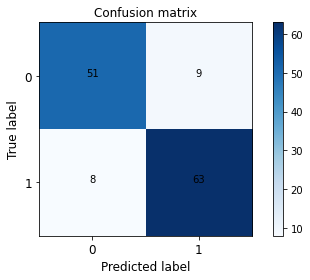

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        60
           1       0.88      0.89      0.88        71

    accuracy                           0.87       131
   macro avg       0.87      0.87      0.87       131
weighted avg       0.87      0.87      0.87       131



### 3) **kNN Classifier**

In [ ]:
predictions, accuracy = evaluate_optimal_clf("KNeighborsClassifier",best_knn_f1_macro_pipelines, best_knn_f1_macro_parameters)
accuracies_opt['Knn'] = accuracy
f1_micros_opt['Knn'] = precision_recall_fscore_support(y_test, predictions, average='micro')[2]
f1_macros_opt['Knn'] = precision_recall_fscore_support(y_test, predictions, average='macro')[2]
print("F1-micro average score is: \033[1m{} %\033[0m".format(f1_micros_opt['Knn']*100))
print("F1-macro average score is: \033[1m{} %\033[0m".format(f1_macros_opt['Knn']*100))

F1-micro average score is: 90.83969465648855 %
F1-macro average score is: 90.79625292740047 %


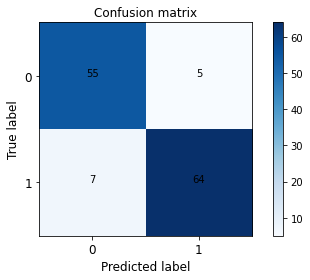

In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions)
custom_plot_confusion_matrix(cnf_matrix, [0,1])

In [ ]:
 print(classification_report(y_test, predictions, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        60
           1       0.93      0.90      0.91        71

    accuracy                           0.91       131
   macro avg       0.91      0.91      0.91       131
weighted avg       0.91      0.91      0.91       131



### Bar plots σύγκρισης βέλτιστων ταξινομητών

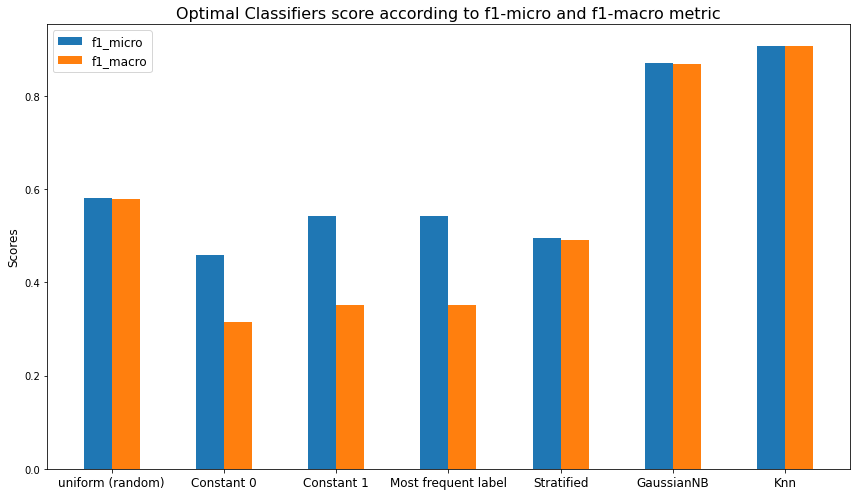

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, list(f1_micros_opt.values()), width, label='f1_micro')
rects2 = ax.bar(x + width/2, list(f1_macros_opt.values()), width, label='f1_macro')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Optimal Classifiers score according to f1-micro and f1-macro metric',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=12)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

Classifier | F1-micro (%) | F1-macro (%)
--- | :---: | :--:
**Knn** | **90.84** | **90.80**
**GaussianNB** | **87.02** | **86.91**
Uniform | 58.02 | 57.93
Most frequent | 54.20 | 35.15
Constant 1 | 54.20 | 35.15
Stratified | 49.62 | 49.12
Constant 0 | 45.80 | 31.41


Τα συμπεράσματα που προκύπτουν είναι ανάλογα με αυτά της ενότητας "Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 micro".

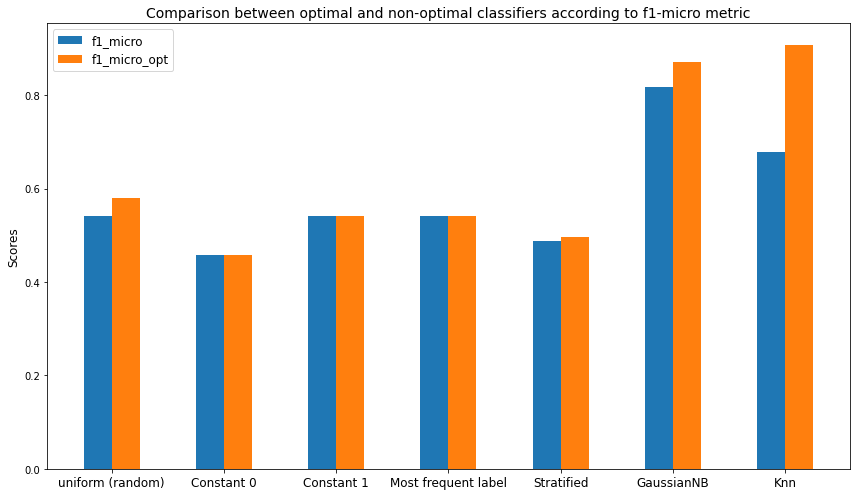

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, list(f1_micros.values()), width, label='f1_micro')
rects2 = ax.bar(x + width/2, list(f1_micros_opt.values()), width, label='f1_micro_opt')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Comparison between optimal and non-optimal classifiers according to f1-micro metric',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=12)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

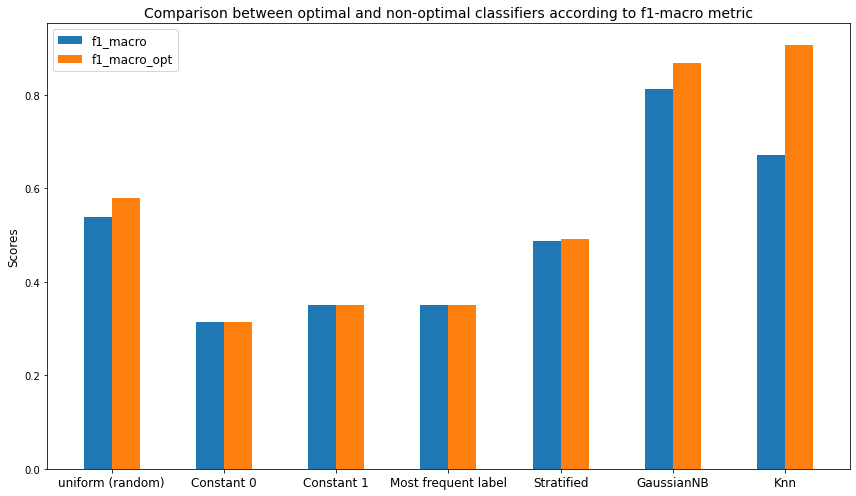

In [ ]:
classifiers = list(f1_micros_opt.keys())
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, list(f1_macros.values()), width, label='f1_macro')
rects2 = ax.bar(x + width/2, list(f1_macros_opt.values()), width, label='f1_macro_opt')

ax.set_ylabel('Scores',fontsize=12)
ax.set_title('Comparison between optimal and non-optimal classifiers according to f1-macro metric',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(classifiers,fontsize=12)
ax.legend(loc='upper left',fontsize=12)

fig.tight_layout()
plt.show()

### Μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους

In [ ]:
print("\033[1mIncrement of Accuracy between Optimal and Non-Optimal Classifiers:\n")
print("------------------------ accuracy differences ------------------------\n")
accuracy_diff = {x: accuracies_opt[x] - accuracies[x] for x in accuracies_opt if x in accuracies}
sorted_accuracy_diff = [(k, accuracy_diff[k]) for k in sorted(accuracy_diff, key=accuracy_diff.get, reverse=True)]
for k, v in sorted_accuracy_diff:
    print("\033[1m",k,":\033[0m",v*100,"%")
print()

Increment of Accuracy between Optimal and Non-Optimal Classifiers:

------------------------ accuracy differences ------------------------

 Knn : 22.90076335877862 %
 GaussianNB : 5.343511450381677 %
 Constant 0 : 0.0 %
 Constant 1 : 0.0 %
 Most frequent label : 0.0 %
 Stratified : 0.0 %
 uniform (random) : -6.870229007633583 %



Classifier | Increment of Accuracy (%)
--- | :---:
**Knn** | **22.90** 
GaussianNB | 5.34
Constant 0 | 0.00
Constant 1 | 0.00
Most frequent | 0.00
Stratified | 0.00
Uniform | -6.87

Τα συμπεράσματα που προκύπτουν είναι ανάλογα με αυτά της ενότητας "Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 micro".

### Σύγκριση χρόνων εκτέλεσης βέλτιστων ταξινομητών για το fit και το predict

In [ ]:
print("\033[1mFit and Predict times of Optimal Classifiers in secs:\n")
print("------------------------ fit times ------------------------\n")
sorted_fit_times = [(k, fit_times[k]) for k in sorted(fit_times, key=fit_times.get, reverse=True)]
for k, v in sorted_fit_times:
    print("\033[1m",k,":\033[0m",v)
print()
print("\033[1m---------------------- predict times ----------------------\n")
sorted_pred_times = [(k, pred_times[k]) for k in sorted(pred_times, key=pred_times.get, reverse=True)]
for m, n in sorted_pred_times:
    print("\033[1m",m,":\033[0m",n)

Fit and Predict times of Optimal Classifiers in secs:

------------------------ fit times ------------------------

 GaussianNB : 0.00787663459777832
 KNeighborsClassifier : 0.0012087821960449219
 Constant 0 : 0.0006327629089355469
 Constant 1 : 0.0005748271942138672
 Most frequent label : 0.0005438327789306641
 Stratified : 0.0005018711090087891
 uniform (random) : 0.0002899169921875

---------------------- predict times ----------------------

 KNeighborsClassifier : 0.008014917373657227
 Stratified : 0.0006506443023681641
 GaussianNB : 0.0006096363067626953
 uniform (random) : 0.0002167224884033203
 Constant 1 : 0.0001747608184814453
 Constant 0 : 0.00017213821411132812
 Most frequent label : 0.0001571178436279297


Classifier | Fit times (secs) | Predicts times (secs)
--- | :---: | :---:
**GaussianNB** | **0.0079** | 0.0006
**Knn** | 0.0012 | **0.0080**
Constant 0 | 0.0006 | 0.0002
Constant 1 | 0.0006 | 0.0002
Most frequent | 0.0005 | 0.0002
Stratified | 0.0005 | 0.0007
Uniform | 0.0003 | 0.0002

Τα συμπεράσματα που προκύπτουν είναι ανάλογα με αυτά της ενότητας "Αξιολόγηση βέλτιστων ταξινομητών που προέκυψαν με βάση την μετρική απόδοσης f1 micro".

**Σημείωση**: Επειδή δεν προσδιορίσαμε κάποιο **random_state** κατά την κλήση της συνάρτησης **train_test_split** τα αποτελέσματα που παρουσιάζονται στο τρέχον notebook αφορούν έναν **τυχαίο διαμοιρασμό του αρχικού dataset** και ενδέχεται να διαφέρουν από εκτέλεση σε εκτέλεση.